# LangGraph ReAct Agent Implementation

**Author**: Sergio Masa Avis  
**Date**: October 2025

Comprehensive implementation of a ReAct (Reasoning + Acting) agent using LangGraph framework. Demonstrates prebuilt agent patterns, tool integration, and real-time web search capabilities with professional-grade execution patterns.

---

## Table of Contents

1. [LangGraph and ReAct Overview](#langgraph-and-react-overview)
2. [Architecture and Framework Components](#architecture-and-framework-components)
3. [Implementation](#implementation)
4. [Agent Execution and Examples](#agent-execution-and-examples)
5. [Advanced Features](#advanced-features)
6. [References](#references)

---

## 1. LangGraph and ReAct Overview

**LangGraph** is a framework for building stateful, multi-actor applications with LLMs, designed as a cyclical computational graph. It extends LangChain with graph-based execution patterns ideal for agent architectures.

**ReAct Pattern in LangGraph** implements the Reasoning and Acting paradigm through prebuilt agent configurations that handle tool calling, state management, and execution flow automatically.

### Core Framework Concepts

- **Graph-Based Execution**: Agents operate as nodes in a computational graph with defined state transitions

- **State Management**: Persistent conversation state across multiple interaction cycles

- **Tool Integration**: Automatic tool calling with function schema generation and validation

- **Streaming Support**: Real-time response generation and intermediate step visibility

![ReAct Flow in LangGraph](images/03_react_langgraph/react_flow_langgraph.png)

### LangGraph vs Custom ReAct Implementation

| Aspect | Custom Implementation | LangGraph Framework |
|--------|----------------------|--------------------|
| **State Management** | Manual conversation history | Automatic state persistence |
| **Tool Calling** | String parsing + regex | Native function calling |
| **Error Handling** | Custom implementation | Built-in retry and fallback |
| **Streaming** | Manual chunking | Native streaming support |
| **Observability** | Custom logging | Integrated tracing |
| **Scalability** | Single-threaded | Multi-node graph execution |

### Problem Statement

Traditional ReAct implementations face several challenges:
- **Fragile parsing**: String-based action extraction prone to format errors
- **State complexity**: Manual conversation history management
- **Limited observability**: Difficult to trace execution flow
- **Tool integration overhead**: Custom schema and validation logic
- **Scalability constraints**: Single-execution-thread limitations

LangGraph solutions:
- Native OpenAI function calling for reliable tool invocation
- Automatic state management with graph persistence
- Built-in observability and execution tracing
- Standardized tool integration through decorators
- Graph-based parallelization and async execution

---

## 2. Architecture and Framework Components

LangGraph ReAct agents utilize a sophisticated architecture with multiple specialized components.

### 2.1. Core Components

#### 2.1.1. Agent Node
- **Purpose**: LLM reasoning and decision-making hub
- **Implementation**: ChatOpenAI integration with function calling
- **Responsibilities**:
    - Query analysis and reasoning
    - Tool selection and invocation
    - Response synthesis and formatting

#### 2.2.2. Tools Node
- **Purpose**: External function execution and API integration
- **Implementation**: Decorated Python functions with automatic schema generation
- **Capabilities**:
    - Web search through Tavily API
    - Date and time utilities
    - Custom business logic integration

#### 2.2.3. State Manager
- **Purpose**: Conversation context preservation and message flow control
- **Features**:
    - Message history persistence
    - Tool call tracking
    - Metadata management

### 2.2. Tool Integration Pattern
LangGraph uses the `@tool` decorator pattern for seamless function integration:

- **Schema Generation**: Automatic OpenAI function schema from type hints and docstrings
- **Parameter Validation**: Runtime type checking and constraint validation
- **Error Propagation**: Structured error handling with agent-readable messages

### 2.3. Design Decisions
| Component | Implementation Choice | Rationale |
|-----------|----------------------|----------|
| **LLM Provider** | ChatOpenAI (GPT-4) | Function calling reliability, reasoning quality |
| **Web Search** | Tavily API | Specialized agent search, structured results |
| **Agent Pattern** | Prebuilt ReAct | Production-ready, battle-tested implementation |
| **State Persistence** | In-memory | Demo simplicity, easy inspection |
| **Streaming Mode** | Values streaming | Real-time user feedback |

---

## 3. Implementation

---

### 3.1 Environment Setup and Dependencies

Configure environment with required LangGraph, LangChain, and external API dependencies.

**Key Dependencies**:
- `langgraph`: Graph-based agent framework
- `langchain-openai`: OpenAI model integrations
- `langchain-tavily`: Web search capabilities
- `langchain-core`: Tool and utility abstractions

**Security**: API keys managed through environment variables to prevent credential exposure.

In [2]:
from datetime import datetime
from dotenv import load_dotenv
import os

from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_tavily import TavilySearch
from langchain.agents import create_agent

from IPython.display import display, Image, Markdown

# Load environment variables from .env file
_ = load_dotenv()

# Verify required API keys are available
required_keys = ["OPENAI_API_KEY", "TAVILY_API_KEY"]
for key in required_keys:
    assert os.getenv(key), f"Missing {key} environment variable"

### 3.2 Language Model Configuration

Initialize ChatOpenAI with optimal configuration for ReAct agent patterns.

- **Model Selection**: GPT-4 chosen for superior reasoning capabilities and function calling reliability
- **Temperature Setting**: 0 for deterministic outputs, ensuring consistent tool calling behavior
- **Function Calling**: Automatic enablement through LangGraph integration

In [3]:
# Initialize ChatOpenAI with GPT-4 for superior reasoning
model = ChatOpenAI(
    model_name="gpt-4",
    temperature=0         # Deterministic outputs for reliable tool usage
)

### 3.3 Tool Configuration and Implementation

Configure external tools and APIs for agent utilization.

---

#### 3.3.1 Web Search Integration

**Tavily Search API**: Specialized search engine optimized for AI agents with structured results and real-time data access.

**Configuration**: Limited to 5 results for optimal LLM context window utilization.

In [5]:
# Configure Tavily search tool
# Note: Obtain Tavily API key from https://tavily.com/
# Set TAVILY_API_KEY in your .env file
tavily_search_tool = TavilySearch(
    max_results=5,  # Limit results for optimal context window usage
    description="Search the web for current information including any real-time data"
)

#### 3.3.2 Custom Tool Implementation

Create custom tool using the `@tool` decorator pattern.

**Implementation Pattern**:
- Decorator-based function definition
- Type hints for parameter validation
- Comprehensive docstring for LLM understanding
- Structured return values

**Use Case**: Date utilities for time-sensitive queries requiring current temporal context.

In [6]:
@tool
def get_current_date() -> str:
    """Returns the current date. Use this tool first for any time-based queries.

    Returns:
        str: Current date in YYYY-MM-DD format

    Usage:
        Essential for queries about "today", "current", "recent" events
        Provides temporal context for time-sensitive information
    """
    current_date = datetime.now().strftime('%Y-%m-%d')
    return f"The current date is: {current_date}"

### 3.4 Agent Initialization and Graph Creation

Create the ReAct agent using LangGraph's prebuilt `create_react_agent` function.

**Agent Components**:
- **Model**: ChatOpenAI with function calling enabled
- **Tools**: List of available functions for agent invocation
- **Graph**: Automatically generated execution graph with agent and tool nodes

**Graph Structure**: Two-node graph with agent reasoning and tool execution nodes connected by state transitions.

In [ ]:
# Create the ReAct agent graph with system message
system_prompt = """You are a helpful assistant with access to these tools:

1. tavily_search: Search the web for ANY information including weather forecasts, news, current events, sports results, etc.
2. get_current_date: Get today's date for temporal context

IMPORTANT: For user queries, ALWAYS use tavily_search to find relevant information.
Never assume you don't have capabilities - you can search for it using tavily_search.

Example searches:
- Weather: "weather forecast Madrid tomorrow"
- Sports: "Real Madrid latest match result"
- News: "latest AI research developments"

Always get current date first for time-sensitive queries, then search for relevant information.

SOURCES FORMAT REQUIREMENT:
ALWAYS include a "Sources:" section at the end of your responses with the following format:

**Sources:**
- [Title of Source 1](URL1)
- [Title of Source 2](URL2)
- [Title of Source 3](URL3)

Use the exact titles and URLs from the search results. This provides transparency and allows users to verify information.
"""

# Combine all tools into a single list
tools = [tavily_search_tool, get_current_date]

# Create the ReAct agent graph
graph = create_agent(model=model, tools=tools, system_prompt=system_prompt, debug=False)

In [18]:
help(create_agent)

Help on function create_agent in module langchain.agents.factory:

create_agent(
    model: 'str | BaseChatModel',
    tools: 'Sequence[BaseTool | Callable | dict[str, Any]] | None' = None,
    *,
    system_prompt: 'str | None' = None,
    middleware: 'Sequence[AgentMiddleware[AgentState[ResponseT], ContextT]]' = (),
    response_format: 'ResponseFormat[ResponseT] | type[ResponseT] | None' = None,
    state_schema: 'type[AgentState[ResponseT]] | None' = None,
    context_schema: 'type[ContextT] | None' = None,
    checkpointer: 'Checkpointer | None' = None,
    store: 'BaseStore | None' = None,
    interrupt_before: 'list[str] | None' = None,
    interrupt_after: 'list[str] | None' = None,
    debug: 'bool' = False,
    name: 'str | None' = None,
    cache: 'BaseCache | None' = None
) -> 'CompiledStateGraph[AgentState[ResponseT], ContextT, _InputAgentState, _OutputAgentState[ResponseT]]'
    Creates an agent graph that calls tools in a loop until a stopping condition is met.

    For 

### 3.5 Graph Visualization and Architecture Analysis

Visualize the agent's execution graph to understand the decision-making flow.

**Graph Components**:
- **Start Node**: Input processing and state initialization
- **Agent Node**: LLM reasoning and tool selection
- **Tools Node**: External function execution
- **End Node**: Response finalization and output

**Execution Flow**: Cyclical pattern between agent reasoning and tool execution until task completion.

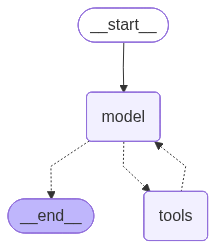

In [19]:
# Visualize the agent's decision-making flow
try:
    graph_image = graph.get_graph().draw_mermaid_png()
    display(Image(graph_image))
except Exception as e:
    print(f"Visualization error: {e}")

## 4. Agent Execution and Examples

---

### 4.1 Execution Utilities and Helper Functions

Implement utilities for clean agent interaction and response handling.

**Design Principles**:
- **Streaming support**: Real-time response visibility
- **Markdown rendering**: Enhanced output formatting
- **Message inspection**: Debug and analysis capabilities
- **Error handling**: Graceful failure management

In [20]:
def render_markdown(content: str) -> None:
    """Render markdown content in Jupyter Notebook for enhanced readability.

    Args:
        content: Markdown-formatted string to display
    """
    display(Markdown(content))

def process_stream(stream) -> object:
    """
    Process streaming agent responses with real-time output display.

    Args:
        stream: LangGraph streaming response iterator

    Returns:
        object: Final message object from the stream

    Features:
        - Real-time message display
        - Pretty printing with formatting
        - Handles multiple message types
    """
    final_message = None

    for chunk in stream:
        # Extract the latest message from the chunk
        if 'messages' in chunk and chunk['messages']:
            message = chunk['messages'][-1]

            # Handle different message types
            if isinstance(message, tuple):
                print(message)
            else:
                # Use pretty_print if available, otherwise print content
                if hasattr(message, 'pretty_print'):
                    message.pretty_print()
                else:
                    print(f"Message: {getattr(message, 'content', str(message))}")

            final_message = message

    return final_message

def process_query(query: str, graph) -> None:
    """
    Complete query processing with streaming and formatted output.

    Args:
        query: User query string

    Features:
        - Streaming execution with real-time feedback
        - Formatted markdown output
        - Error handling and recovery
    """
    try:
        # Prepare input in LangGraph format
        inputs = {"messages": [("user", query)]}

        # Stream the response with values mode
        stream = graph.stream(inputs, stream_mode='values')
        message = process_stream(stream)

        # Render final answer in markdown format
        if message and hasattr(message, 'content'):
            render_markdown(f"## Answer:\n{message.content}")
        else:
            print("Query completed but no final message content available")

    except Exception as e:
        print(f"Query processing error: {e}")
        print("Please check your API keys and network connection")

### 4.2 Practical Examples and Use Cases

Demonstrate agent capabilities through real-world scenarios.

---

#### 4.2.1 Real-Time Sports Information Retrieval

Query current sports results demonstrating web search integration and date awareness.

In [21]:
# Example 1: Real-time sports information
process_query(
    "Who won the latest Real Madrid vs Barcelona match? Provide the date of the match as well.",
    graph,
)

================================ Human Message =================================

Who won the latest Real Madrid vs Barcelona match? Provide the date of the match as well.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_ei4tzCq5EiMd1vQWHglHYu0E)
 Call ID: call_ei4tzCq5EiMd1vQWHglHYu0E
  Args:
    query: latest Real Madrid vs Barcelona match result
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest Real Madrid vs Barcelona match result", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.si.com/onsi/soccer/real-madrid/matchday/real-madrid-vs-barcelona-preview-start-time-team-news-how-to-watch-live-stream-odds-01k8db467wsq", "title": "Real Madrid vs Barcelona Preview: Start Time, Team News, How To Watch, Live Stream & Odds - Sports Illustrated", "score": 0.92176014, "publ

## Answer:
The latest match between Real Madrid and Barcelona took place on October 26, 2025. Real Madrid won the match with a score of 2-1.

**Sources:**
- [Player Ratings: Real Madrid 2 - 1 Barcelona - Managing Madrid](https://www.managingmadrid.com/real-madrid-cf-la-liga/99811/player-ratings-real-madrid-2-1-barcelona)
- [Immediate Reaction: Real Madrid 2-1 Barcelona - Managing Madrid](https://www.managingmadrid.com/el-clasico/99785/immediate-reaction-real-madrid-2-1-barcelona)
- [Real Madrid vs Barcelona Preview: Start Time, Team News, How To Watch, Live Stream & Odds - Sports Illustrated](https://www.si.com/onsi/soccer/real-madrid/matchday/real-madrid-vs-barcelona-preview-start-time-team-news-how-to-watch-live-stream-odds-01k8db467wsq)

#### 4.2.2 Temporal Queries with Date Context

Demonstrate agent's ability to use temporal context for accurate information retrieval.

In [22]:
# Example 2: Temporal context with current date
process_query("What are the latest developments in AI research this week?", graph)

================================ Human Message =================================

What are the latest developments in AI research this week?
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_u61BPUfL1YTiTpKHsD4JvLTF)
 Call ID: call_u61BPUfL1YTiTpKHsD4JvLTF
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 2025-10-28
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_FcdH5AOySabuwOF58xwWvmkR)
 Call ID: call_FcdH5AOySabuwOF58xwWvmkR
  Args:
    query: latest developments in AI research
    time_range: week
    topic: general
    search_depth: advanced
================================= Tool Message =================================
Name: tavily_search

{"query": "latest developments in AI research", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url":

## Answer:
Here are some of the latest developments in AI research this week:

1. AI Supremacy in 2025: Major AI labs have invested heavily in alignment research to keep AI models truthful, unbiased, and harmless. OpenAI, for instance, has continually refined its training techniques to curb unwanted behavior. GPT-5 was explicitly designed to reduce hallucinations and sycophantic answers, and to follow user instructions more faithfully than prior models. AI has also permeated other gadgets like smart home cameras and IoT sensors in industrial settings. [AI Supremacy in 2025: Challenges, Breakthroughs, and the ... - TTMS](https://ttms.com/my/an-update-to-supremacy-ai-chatgpt-and-the-race-that-will-change-the-world/)

2. Real-time Audio Deepfakes Have Arrived: A cybersecurity firm has created convincing voices on the fly. Also, a powerful generative AI tool has been developed that could accelerate drug discovery by predicting what cells will look like before running any experiments. [AI News & Articles - Artificial Intelligence Updates - IEEE Spectrum](https://spectrum.ieee.org/topic/artificial-intelligence/)

3. AI in Action | October 2025: NVIDIA-powered agentic AI is set to accelerate every step of the pharmaceutical life cycle in collaboration with IQVIA, the world’s leading provider of clinical research services. [AI in Action | October 2025 - TechNet](https://www.technet.org/media/ai-in-action-october-2025/)

4. Oxford spinout RADiCAIT uses AI to make diagnostic imaging more affordable and accessible. Biotech Nephrogen combines AI and gene therapy to reverse kidney disease. Pinterest experiments with new AI-powered personalized boards. OpenAI says over a million people talk to ChatGPT about suicide weekly. [AI News & Artificial Intelligence | TechCrunch](https://techcrunch.com/category/artificial-intelligence/)

**Sources:**
- [AI Supremacy in 2025: Challenges, Breakthroughs, and the ... - TTMS](https://ttms.com/my/an-update-to-supremacy-ai-chatgpt-and-the-race-that-will-change-the-world/)
- [AI News & Articles - Artificial Intelligence Updates - IEEE Spectrum](https://spectrum.ieee.org/topic/artificial-intelligence/)
- [AI in Action | October 2025 - TechNet](https://www.technet.org/media/ai-in-action-october-2025/)
- [AI News & Artificial Intelligence | TechCrunch](https://techcrunch.com/category/artificial-intelligence/)

In [23]:
# Example 3: Temporal context with current date
process_query(
    "What outfit should I wear tomorrow based on the weather in Madrid tomorrow?", graph
)

================================ Human Message =================================

What outfit should I wear tomorrow based on the weather in Madrid tomorrow?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_K8rQMi55b0BZLcqHhj4Ijzyl)
 Call ID: call_K8rQMi55b0BZLcqHhj4Ijzyl
  Args:
    query: weather forecast Madrid tomorrow
================================= Tool Message =================================
Name: tavily_search

{"query": "weather forecast Madrid tomorrow", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Weather in Madrid", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Madrid', 'region': 'Madrid', 'country': 'Spain', 'lat': 40.4, 'lon': -3.6833, 'tz_id': 'Europe/Madrid', 'localtime_epoch': 1761676413, 'localtime': '2025-10-28 19:33'}, 'current': {'last_updated_epoch': 1761676200, 'last_updated': '2025-10-28 19:30', 'temp_c': 16.1, 'temp_f': 61.0, 'is

## Answer:
The weather forecast for Madrid tomorrow indicates clear skies with temperatures ranging from 17°C to 19°C (about 63°F to 66°F). 

Based on this, you might want to consider wearing light layers. A light sweater or jacket might be useful in the morning or evening when temperatures are at the lower end. During the day, when the temperature is at its peak, you might be comfortable in a short-sleeved shirt or blouse. Don't forget to wear sunglasses to protect your eyes from the sun.

**Sources:**
- [Weather in Madrid](https://www.weatherapi.com/)
- [Weather Forecast for Madrid for Wednesday 29 October](https://www.metcheck.com/WEATHER/dayforecast.asp?location=Madrid&locationID=564399&lat=40.4165&lon=-3.70256&dateFor=29/10/2025)

## 5. References

**Official Documentation**:
- [LangGraph Documentation](https://python.langchain.com/docs/langgraph)
- [LangGraph GitHub Repository](https://github.com/langchain-ai/langgraph)
- [LangChain Documentation](https://python.langchain.com/docs/get_started/introduction)
- [OpenAI Function Calling](https://platform.openai.com/docs/guides/function-calling)

**ReAct Pattern and Agent Architectures**:
- [ReAct: Synergizing Reasoning and Acting](https://arxiv.org/abs/2210.03629)
- [Toolformer: Language Models Can Teach Themselves to Use Tools](https://arxiv.org/abs/2302.04761)
- [WebGPT: Browser-assisted question-answering](https://arxiv.org/abs/2112.09332)
- [Language Models as Tool Users](https://arxiv.org/abs/2302.04761)

**LangGraph Specific Resources**:
- [LangGraph Tutorials](https://python.langchain.com/docs/langgraph/tutorials)
- [Prebuilt Agents](https://python.langchain.com/docs/langgraph/reference/prebuilt)
- [State Management](https://python.langchain.com/docs/langgraph/concepts/state)
- [Streaming in LangGraph](https://python.langchain.com/docs/langgraph/concepts/streaming)

**Tool Integration and APIs**:
- [Tavily Search API](https://tavily.com/)
- [LangChain Tools](https://python.langchain.com/docs/concepts/tools)
- [Tool Calling Best Practices](https://python.langchain.com/docs/concepts/tool_calling)

**Production and Deployment**:
- [LangServe](https://python.langchain.com/docs/langserve) - REST API deployment
- [LangSmith](https://smith.langchain.com/) - Monitoring and evaluation
- [OpenAI Production Best Practices](https://platform.openai.com/docs/guides/production-best-practices)
- [LangGraph Production Guide](https://python.langchain.com/docs/langgraph/how-tos/deploy)

**Related Papers and Research**:
- [Chain-of-Thought Prompting](https://arxiv.org/abs/2201.11903)
- [Constitutional AI](https://arxiv.org/abs/2212.08073)
- [Tool Learning with Foundation Models](https://arxiv.org/abs/2304.08354)

**Community Resources**:
- [LangChain Community](https://github.com/langchain-ai/langchain-community)
- [LangGraph Examples](https://github.com/langchain-ai/langgraph/tree/main/examples)
- [LangChain Blog](https://blog.langchain.dev/)

---

*Last updated: October 2025*